# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/14/2022
* Student Name: Jasmine Malik
* Student Net ID: jm5xx
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: https://github.com/jasminemalik/FinalProject

# The Monte Carlo Module

In [1]:
# A code block with your classes.
import pandas as pd
import numpy as np
import random

class Die:
    
    """
    A die has N sides, or “faces”, and W weights, and can be rolled to select a face. 
    The die has one behavior, which is to be rolled one or more times.
    """
    
    def __init__(self, faces):
        """
        Initializes a die object. Takes in a list of faces as either numbers or strings.
        Returns None and just initializes an object. 
        Has faces, a list of the die faces as an attribute
        Has weights that are set to 1 for each face, list
        creates a dataframe with faces and weights
        """


        self.faces = faces
        self.weights = np.ones(len(faces))
        self._df = pd.DataFrame({'faces':self.faces,
                               'weights':self.weights})
    def change_weight(self, die_face, new_weight):
        """
        This method changes a weight of one face of a die.
        It has two params, the face to change, and the new weight.
        It will return the new dataframe with the updated weight.

        Checks to make sure a valid weight is entered
        """
        if type(new_weight) == int or type(new_weight) == float:
            if die_face in self.faces:
                ind = self.faces.index(die_face)

                if type(float(new_weight)) == float:
                        oldweight = self._df['weights'][ind]
                        self._df.at[ind,'weights'] = new_weight
                        #return self.df
                else:
                    return "Weight cannot be converted into a float"

            else:
                return "The number inputed is not a face in the die"
        else:
            return "Enter a numeric for weight"
        
        
        
    def show_die(self):
        '''
        Shows the current die, faces with current weights. Takes no parameters and returns the dataframe.
        '''
        return self._df
    
    def roll_die(self,n=1):
        '''
        This method takes a random face from the die object, according to the weights to each face.
        It has one parameter, number of rolls and will return a list of the rolls. 
        '''
        rolls = []
        for i in range(n):
            x = random.choices(self.faces, weights = self._df['weights'])
            rolls = np.append(rolls, x)
        return list(rolls)
               
class Game:
    '''
    A game consists of rolling of one or more dice of the same kind one or more times. 
    By “same kind” and “similarly defined” we mean that each die in a given game has the
    same number of sides and associated faces, but each die object may have its own weights.
    '''
    def __init__(self, dies):
        """
        Creates a game. Has parameter of a list of die. Checks to ensure that die are similar. 
        Returns nothing, creates the attribute of dies.
        """
        
        for i in range(len(dies)-1):
            if len(dies[i].faces) != len(dies[i+1].faces):
                print("All dies entered must have the same number of faces")
            else:
                break
        

        for i in range(len(dies)-1):
            if type(dies[i].faces[0]) != type(dies[i+1].faces[0]):
                print("All dies entered must be of the same type of faces")
            else:
                self.dies = dies
    
    
    #Dies are the columns
    def play(self, rolls):
        '''
        The play method takes one parameter, the number of rolls each die should be rolled.
        Saves the result ot a private dataframe.
        '''
        
        final_df = pd.DataFrame()
        count = 1
        num = 1
        rolls_list = []
        
        for die in self.dies:
            
            val = die.roll_die(rolls)
            final_df['Die ' + str(count)] = val
            count += 1

        for i in range(rolls):
            rollname = "Roll " + str(num)
            rolls_list = np.append(rolls_list, rollname)
            num += 1
        
        final_df.index = rolls_list
        final_df.index.name = 'Roll Number'
        self._widedf = final_df
        #return self._widedf 
        
    def show(self, form = "wide"):
        """
        A method to show the user the results of the most recent play.
        Has one parameter, set to wide that is a dataframe with rows x die.
        The other valid form is narrow, which is the dataframe, stacked.
        """
        if form == "wide" or form == "narrow":
            if form == "narrow":
                df_narrow = pd.DataFrame(self._widedf.stack(), columns = ['Face Value'])                   
                return df_narrow
            
            else:
                return self._widedf
       
        else:
            return "Please enter either 'wide' or 'narrow' as a valid form"

class Analyzer:
    """
    An analyzer takes the results of a single game and computes various descriptive 
    statistical properties about it. These properties results are available as 
    attributes of an Analyzer object.
    """
    
    def __init__(self, game):
        '''
        Creates an analyzer object, that has a game object as a parameter. 
        '''
        self.game = game
        
    def face_counts(self):
        '''
        Compute how many times a given face is rolled in each event.
        Stores the results as a dataframe in a public attribute.
        The dataframe has an index of the roll number and face values
        as columns (i.e. it is in wide format).

        '''
        ansdf = pd.DataFrame()
        faces_list = self.game.dies[0].faces
        count = 0
        
        for row in self.game._widedf.iterrows():
            x = row[1]
            y = x.value_counts()
            ansdf = pd.concat([ansdf, y], axis = 1)
            ansdf = ansdf.fillna(0)
        
        self.face_df = ansdf.T
        #return self.ansdf.T
    
    def combo(self):
        '''
        Computes the distinct combinations of faces rolled, along with their counts and puts in a
        dataframe.
        '''
        self.combo_df = self.game.show().apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('n')   
        #return combo_df
    
    def jackpot(self):
        '''
        Method to compute how many times the game resulted in all faces being identical.
        Returns an integer for the number times to the user.
        Stores the results as a dataframe of jackpot results in a public attribute.
        '''
        iterate_df = self.game.show()
        final_jp_df = pd.Series(dtype=int)
        count = 0
        
        for row in iterate_df.iterrows():
            x = row[1]
            y = x.unique()
            
            if len(y) == 1:
                count += 1
                row_number = row[0]
                new_df = pd.Series({row_number:y[0]}, index=[row_number])
                final_jp_df = pd.concat([final_jp_df, new_df], axis = 0)
                final_jp_df = pd.DataFrame(final_jp_df, columns = ['Face Value'])
                self.final_jp_df = final_jp_df.dropna()

            else:
                self.final_jp_df = pd.DataFrame({'Jackpot':[0]})
                
        return count

# Test Module

In [2]:
import unittest
from classes import *


#RECIEVE CORRECT INPUTS AND RETURN CORRECT OUTPUTS

class TestingClass(unittest.TestCase):
    '''
    This is a class that imports unittest and the die classes to
    create unit tests for each method, which are below.
    '''
    
    def test_die(self):
        '''
        Creates a die object, tests the insertion of faces
        '''
        faces = [1,2,3]
        test_die = Die(faces)
        
        self.assertEqual(test_die.faces, faces)

        
    def test_change_weight(self):
        """
        This method tests the change_weight method on a die object.
        It inputs an invalid face value, and then also an invalid weight value.
        """
        faces = [1,2,3]
        test_die = Die(faces)

        incorrect_face = test_die.change_weight(4,1)
        expect_ed = 'The number inputed is not a face in the die'

        self.assertEqual(incorrect_face, expect_ed)

        incorrect_weight = test_die.change_weight(1,"t")
        expect_ed = 'Enter a numeric for weight'
        
        self.assertEqual(incorrect_weight, expect_ed)

    def test_show_die(self):
        """
        This method tests the show_die method. 
        Tests it by changing the weight and then testing
        to see if the weight has updated in the dataframe.
        """
        faces = [1,2,3]
        test_die = Die(faces)
        test_die.change_weight(1,5)
        testdf = test_die.show_die()

        self.assertEqual(testdf.at[0,'weights'], 5)

    def test_roll(self):
        '''
        Tests the roll method in the die class, ensures
        that the proper data type is returned and that the 
        correct values are in the list
        '''
        faces = [3]
        test_die = Die(faces)
       
        rolls_list = test_die.roll_die(3)

        self.assertEqual(len(test_die.roll_die(3)), 3)
        self.assertEqual(type(rolls_list), list)
        self.assertTrue(rolls_list[0]==3)


#Testing the Game Class methods

    def test_game_init(self):
        '''
        Tests the creation of a game object.
        '''
        faces = [1,2,3,4,5,6]
        faces2 = [1,2,3,4,5,6]
        
        test_die = Die(faces)
        test_die2 = Die(faces2)

        dielist = [test_die, test_die2]
        testgame = Game(dielist)

        self.assertEqual(testgame.dies, dielist)


    def test_play(self):
        '''
        Tests the play method in the game class. Ensures that a dataframe is outputed,
        and that it is of the right size.
        '''
        faces = [1,1,1]
        faces2 = [6,6,6]
        
        test_die = Die(faces)
        test_die2 = Die(faces2)

        dielist = [test_die, test_die2]
        testgame = Game(dielist)
        testgame.play(5)

        testdf = testgame.show()

        self.assertEqual(len(testdf), 5)
        self.assertEqual(testdf.values[0][0],1)
        self.assertEqual(type(testdf), pd.DataFrame)


    def test_show(self):
        '''
        This tests shows the show() metohd in the Game class. We test to make sure 
        the dataframe sizes and values are correct based off of the face values on 
        die objects in the game.
        '''
        faces = [1,1,1]
        faces2 = [2,2,2]
        
        test_die = Die(faces)
        test_die2 = Die(faces2)

        dielist = [test_die, test_die2]
        testgame = Game(dielist)
        testgame.play(5)

        testshowdf = testgame.show()

        self.assertEqual(len(testgame.show()), 5)
        self.assertEqual(len(testgame.show(form = "narrow")), 10)
        self.assertEqual(testshowdf.values[0][0], 1)


#Test methods for the Analyzer class 

    def test_analyzer_init(self):
        '''
        This tests the Analyzer initializer method. If the game attribute 
        is accurate for the object.
        '''
        faces = [1,2,3,4,5,6]
        faces2 = [1,2,3,4,5,6]
        
        test_die = Die(faces)
        test_die2 = Die(faces2)

        dielist = [test_die, test_die2]
        testgame = Game(dielist)
        testgame.play(5)

        test_analyzer = Analyzer(testgame)

        self.assertEqual(test_analyzer.game, testgame)
        self.assertTrue(type(test_analyzer), Analyzer)

    def test_analyzer_face_counts(self):
        '''
        Tests the face_counts method in the Analyzer class. Tests for correct values,
        type of return and size of expected object to be returned.
        '''
        faces = [1,1]
        faces2 = [4,4]
        
        test_die = Die(faces)
        test_die2 = Die(faces2)

        dielist = [test_die, test_die2]
        testgame = Game(dielist)
        testgame.play(5)

        test_analyzer = Analyzer(testgame)
        test_analyzer.face_counts()

       
        self.assertEqual(len(test_analyzer.face_df.columns), 2)
        self.assertEqual(test_analyzer.face_df.values[0][0], 1)

    def test_analyzer_combo(self):
        '''
        This method tests the combo method in the analyzer class. It returns a dataframe 
        and this method will test for the correct values and size for the dataframe. 
        '''
        faces = [1,1,1,1]
        test_die = Die(faces)
      
        faces2 = [1,1]
        test_die2 = Die(faces2)
        
        dielist = [test_die, test_die]
        
        testgame1 = Game(dielist)
        testgame1.play(5)

        test_analyzer1 = Analyzer(testgame1)
        test_analyzer1.combo()

        self.assertTrue(len(test_analyzer1.combo_df), 5)

    def test_analyzer_jackpot(self):
        '''
        This method tests the jackpot method in the analyzer class. Tests for the correct 
        output for the method and the right amount of columns
        '''
        faces = [1,2,3,4,5,6]
        faces2 = [1,2,3,4,5,6]
        
        test_die = Die(faces)
        test_die2 = Die(faces2)

        dielist = [test_die, test_die2]
        testgame = Game(dielist)
        testgame.play(5)

        test_analyzer = Analyzer(testgame)
        jp = test_analyzer.jackpot()
        self.assertEqual(type(jp), int)

        jp_df = test_analyzer.final_jp_df

        self.assertEqual(len(jp_df.columns),1)




#if __name__ == '__main__':
#    unittest.main(verbosity=3)


# Test Results

In [3]:
# test_analyzer_combo (__main__.TestingClass)
# This method tests the combo method in the analyzer class. It returns a dataframe ... ok
# test_analyzer_face_counts (__main__.TestingClass)
# Tests the face_counts method in the Analyzer class. Tests for correct values, ... ok
# test_analyzer_init (__main__.TestingClass)
# This tests the Analyzer initializer method. If the game attribute ... ok
# test_analyzer_jackpot (__main__.TestingClass)
# This method tests the jackpot method in the analyzer class. Tests for the correct ... ok
# test_change_weight (__main__.TestingClass)
# This method tests the change_weight method on a die object. ... ok
# test_die (__main__.TestingClass)
# Creates a die object, tests the insertion of faces ... ok
# test_game_init (__main__.TestingClass)
# Tests the creation of a game object. ... ok
# test_play (__main__.TestingClass)
# Tests the play method in the game class. Ensures that a dataframe is outputed, ... ok
# test_roll (__main__.TestingClass)
# Tests the roll method in the die class, ensures ... ok
# test_show (__main__.TestingClass)
# This tests shows the show() metohd in the Game class. We test to make sure ... ok
# test_show_die (__main__.TestingClass)
# This method tests the show_die method. ... ok

# ----------------------------------------------------------------------
# Ran 11 tests in 0.022s

# OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

Relative jackpot frequencies for Unfair  coins: 0.3564
Relative jackpot frequencies for Fair coins: 0.2489


Text(0.5, 1.0, 'Frequenices of jackpot in games')

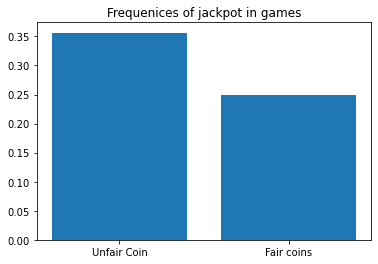

In [10]:
from classes import *

import matplotlib.pyplot as plt

ht = ['H','T']
coin1 = Die(ht)
coin2 = Die(ht)
coin2.change_weight('H', 5)


scenario1_F = Game([coin1,coin1,coin1])
scenario1_F.play(10000)

scenario1_UF = Game([coin2,coin2,coin1])
scenario1_UF.play(10000)

analyze_uf = Analyzer(scenario1_UF)
print("Relative jackpot frequencies for Unfair  coins: " + str(analyze_uf.jackpot()/10000))

analyze_f = Analyzer(scenario1_F)
print("Relative jackpot frequencies for Fair coins: " + str(analyze_f.jackpot()/10000))

bar_names = ['Unfair Coin', 'Fair coins']
bar_list = [analyze_uf.jackpot()/10000, analyze_f.jackpot()/10000]
plt.bar(x = bar_names, height=bar_list)
plt.title('Frequenices of jackpot in games')


## Scenario 2

Text(0.5, 1.0, 'Unfair Die')

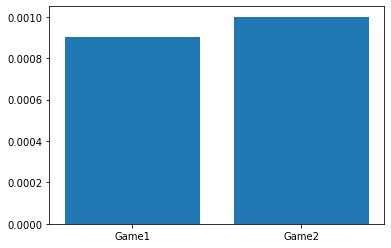

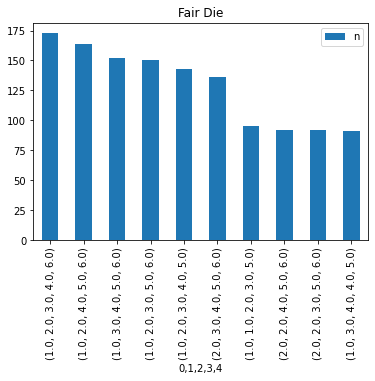

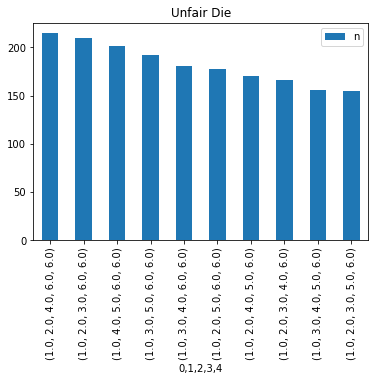

In [11]:
faces = [1,2,3,4,5,6]

fair_die = Die(faces)
unfair_die1 = Die(faces)
unfair_die2 = Die(faces)

unfair_die1.change_weight(6,5)
unfair_die2.change_weight(1,5)

scen2_game1 = Game([fair_die,fair_die,fair_die,fair_die,fair_die])
scen2_game1.play(10000)
scen2_game2 = Game([unfair_die1,unfair_die1,unfair_die2,fair_die,fair_die])
scen2_game2.play(10000)

analyzer1 = Analyzer(scen2_game1)
analyzer2 = Analyzer(scen2_game2)


barlist = [analyzer1.jackpot()/10000, analyzer2.jackpot()/10000]
barnames = ['Game1', 'Game2']
plt.bar(x = barnames, height=barlist)

analyzer1.combo()
analyzer2.combo()

analyzer1.combo_df[:10].plot.bar()
plt.title('Fair Die')
analyzer2.combo_df[:10].plot.bar()
plt.title('Unfair Die')

## Scenario 3

In [12]:
import string
faces = list(string.ascii_uppercase)
weights_list = [8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034, 7.5448, 0.1965,1.1016
                ,5.4893,3.0129,6.6544,7.1635, 3.1671,0.1962,7.5809,5.7351, 6.9509, 3.6308,
                1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

alphadie = Die(faces)
for let in range(len(faces)):
    alphadie.change_weight(faces[let], weights_list[let])

same_words = 0
scrabblewords = pd.read_csv('Collins Scrabble Words (2019).txt')
alpha_game = Game([alphadie,alphadie,alphadie,alphadie,alphadie])
alpha_game.play(1000)
alpha_df = alpha_game.show()


my_words = []
for row in alpha_df.values:
    p = ''.join(row)
    my_words.append(p)
    
scrabblewords_list = []
for i in range(len(scrabblewords)):
    scrabblewords_list.append(scrabblewords.values[i][0])
    
same_words = list(set(my_words) & set(scrabblewords_list))
print('There are ' + str(len(same_words)) + ' combinations that are words!')

print('The relative frequency of these words is ' + str(len(same_words)/1000))


There are 10 combinations that are words!
The relative frequency of these words is 0.01


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [ ]:
!ls -lRF -o

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands